In [ ]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 73.0MB/s] 


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 10_000
    display.max_colwidth = 199
    display.width = 1000
set_pandas_display_options()

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


In [ ]:
n_columns = df.select_dtypes('float64').columns.tolist()

n_columns

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

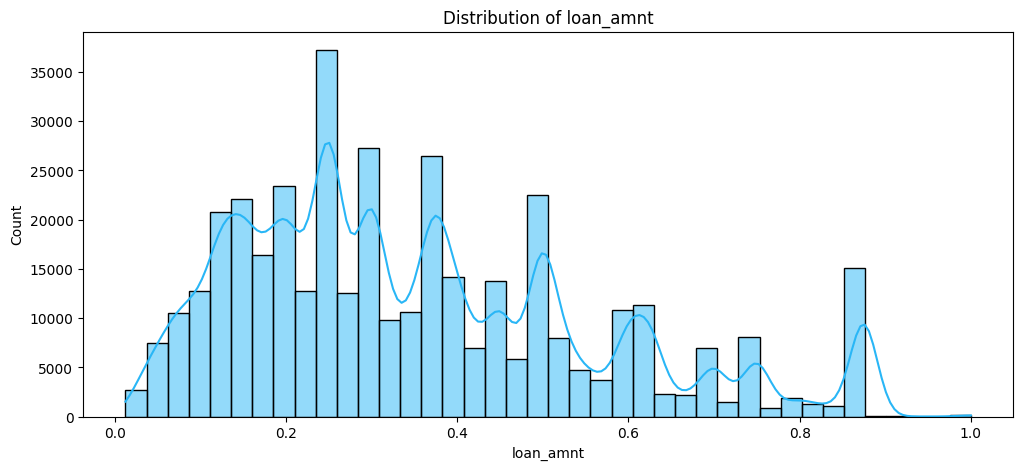

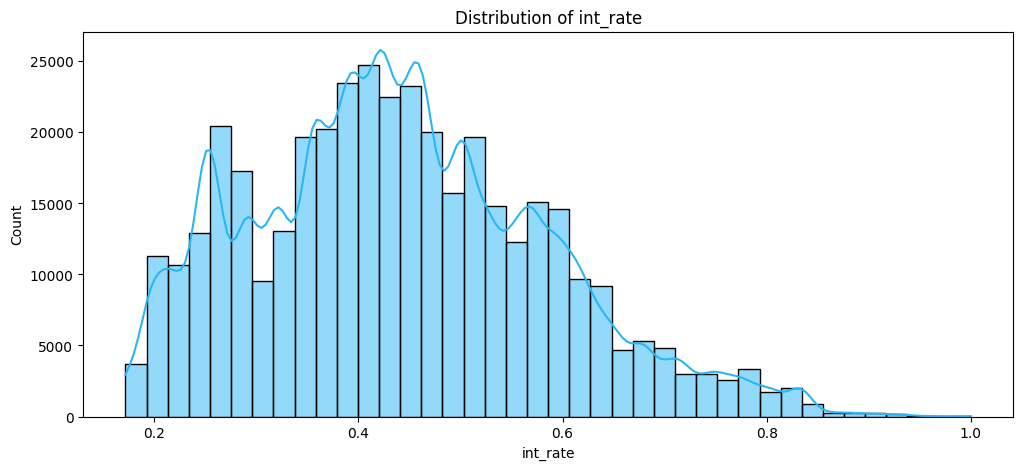

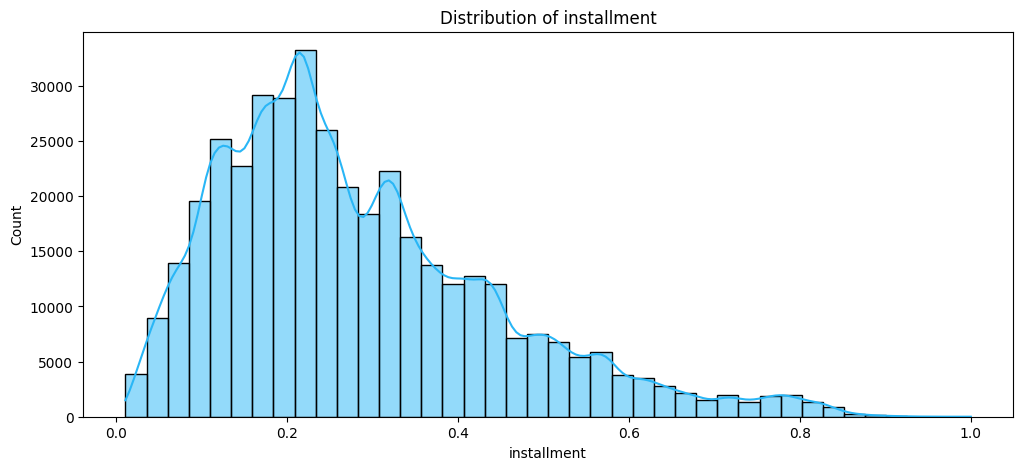

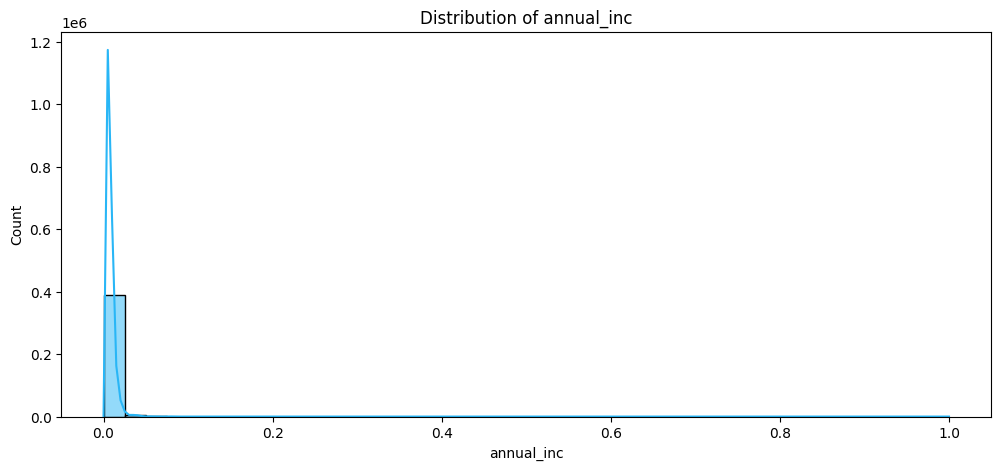

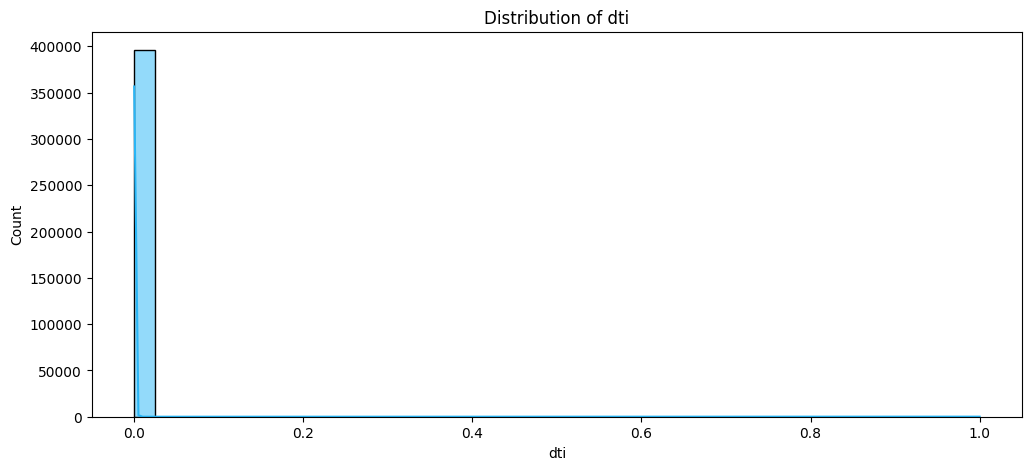

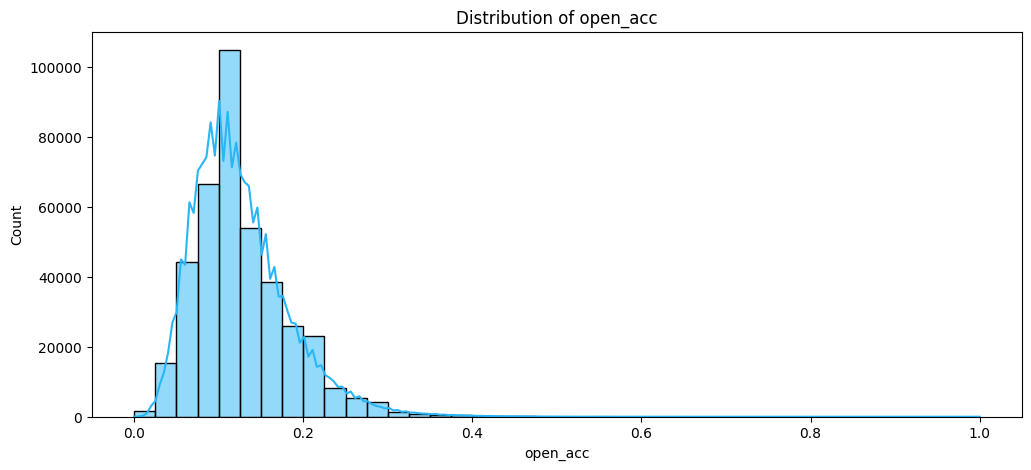

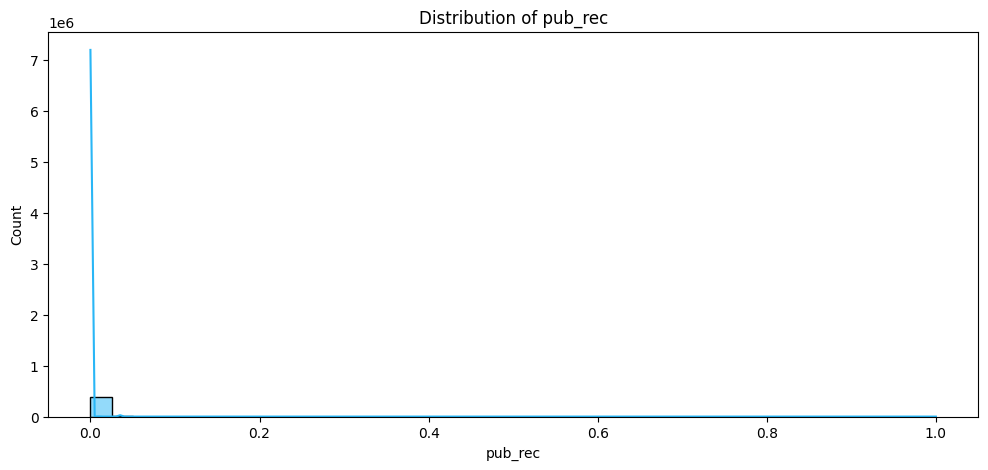

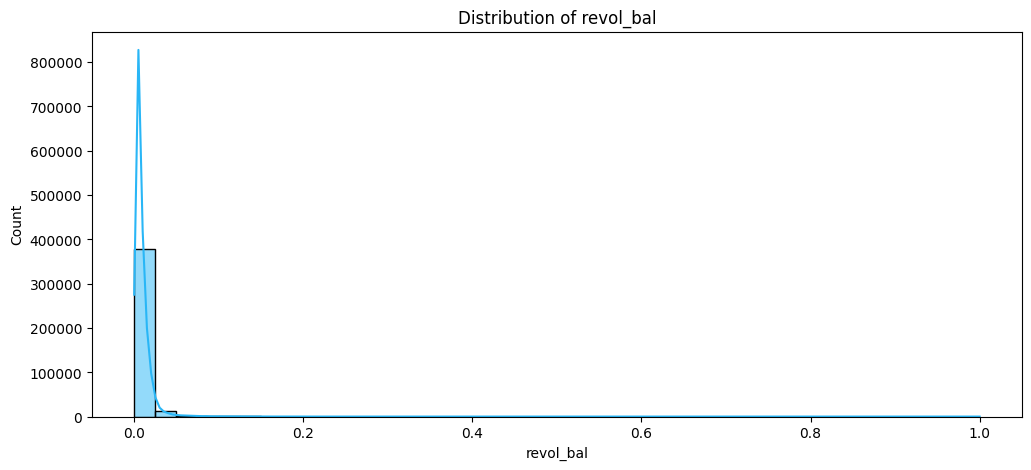

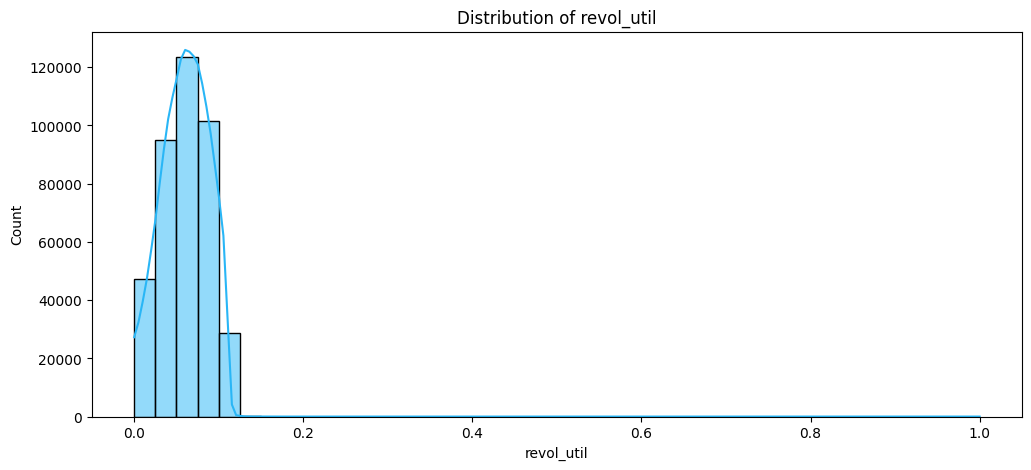

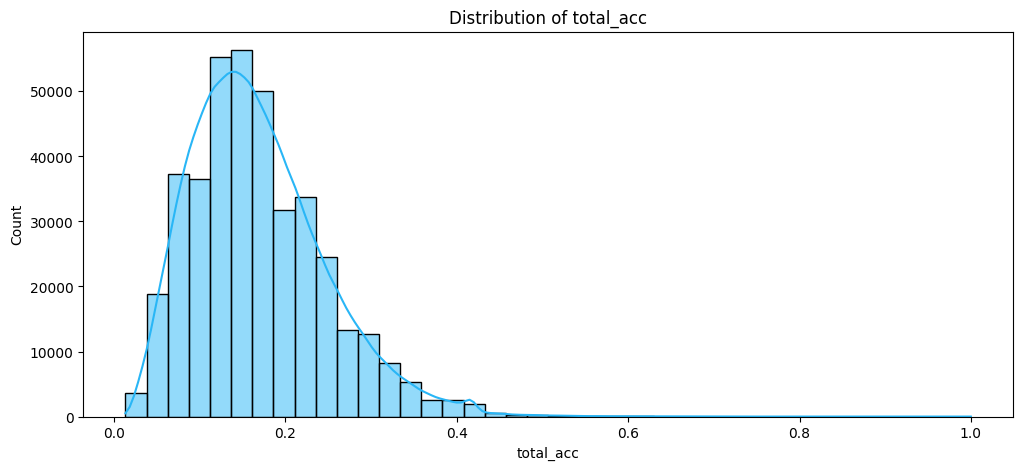

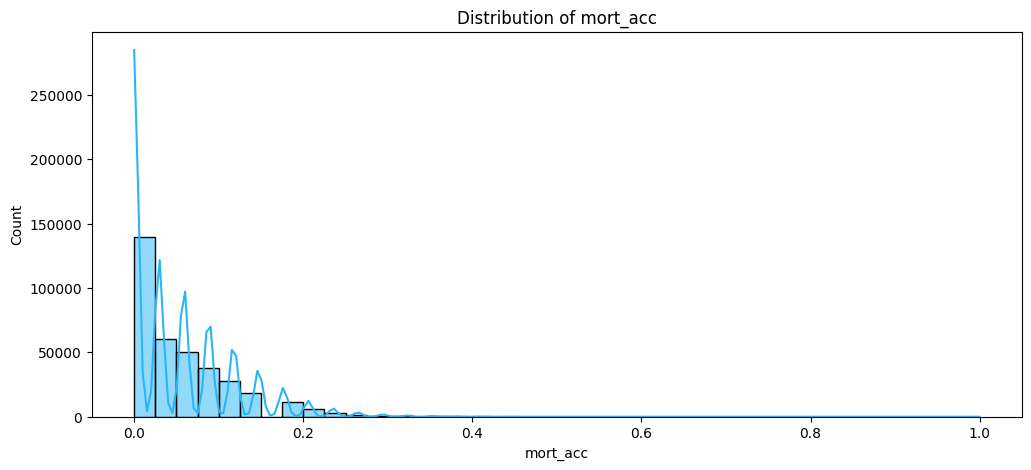

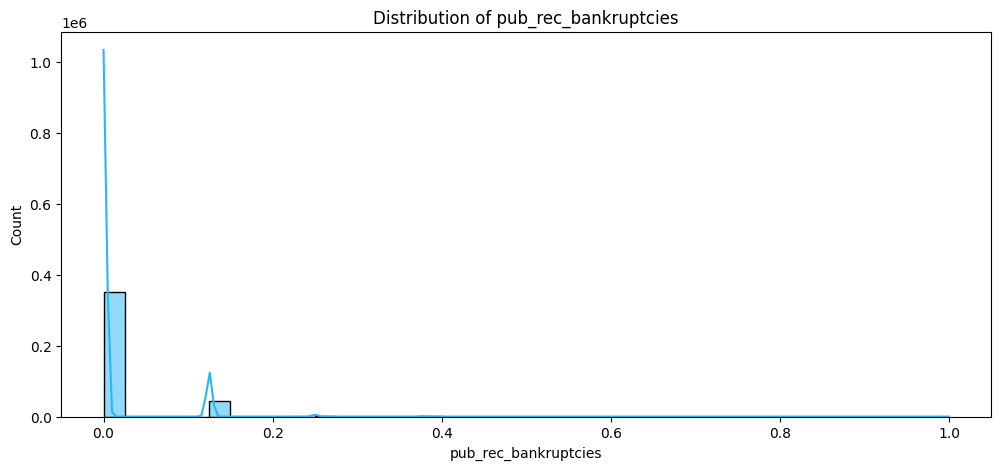

In [ ]:
for i in n_columns:
    plt.figure(figsize=(12,5))
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True,color="#29B6F6", bins=40)
    plt.show()

In [ ]:
c_columns = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']


<ipython-input-13-3e0e41c5e31d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='colorblind')


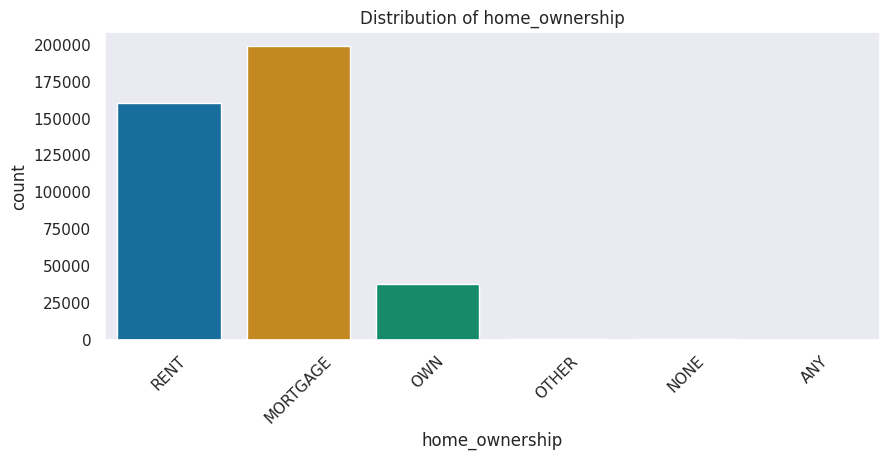

<ipython-input-13-3e0e41c5e31d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='colorblind')


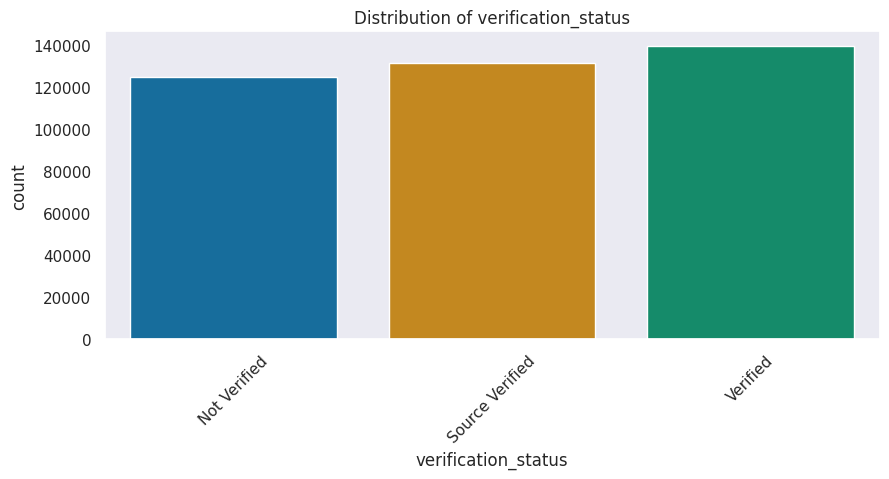

<ipython-input-13-3e0e41c5e31d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='colorblind')


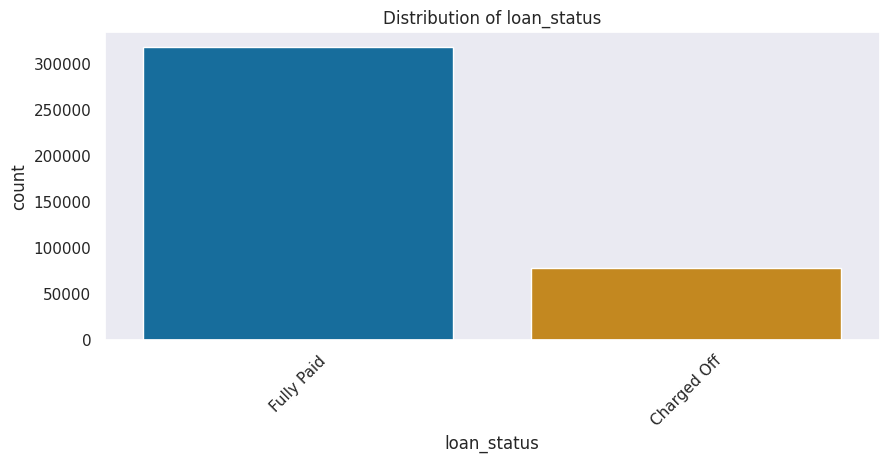

<ipython-input-13-3e0e41c5e31d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='colorblind')


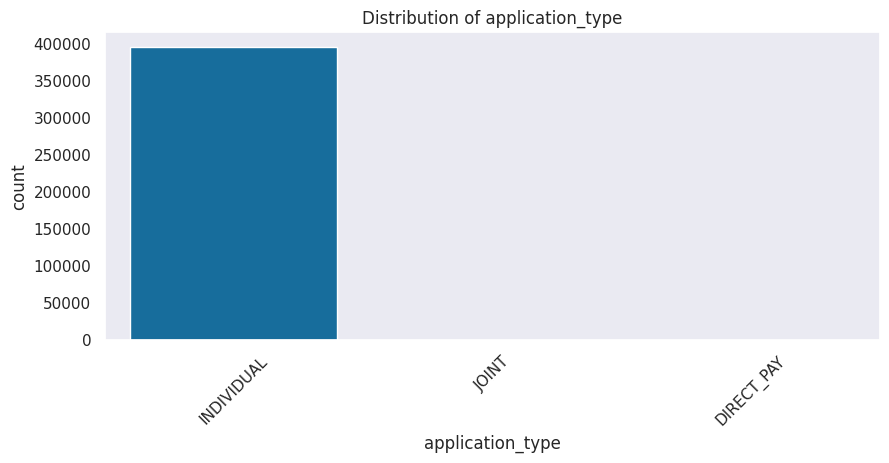

<ipython-input-13-3e0e41c5e31d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='colorblind')


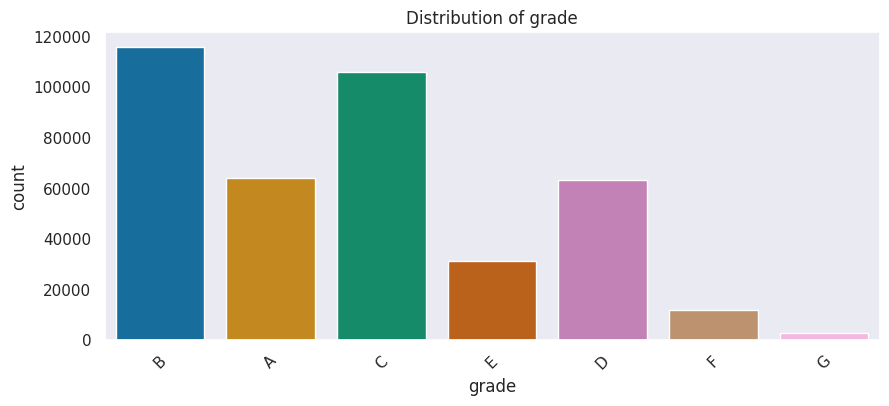

<ipython-input-13-3e0e41c5e31d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='colorblind')


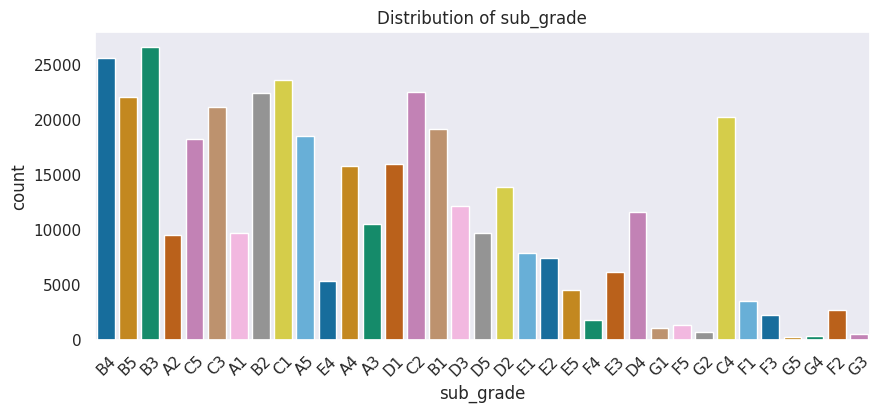

<ipython-input-13-3e0e41c5e31d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='colorblind')


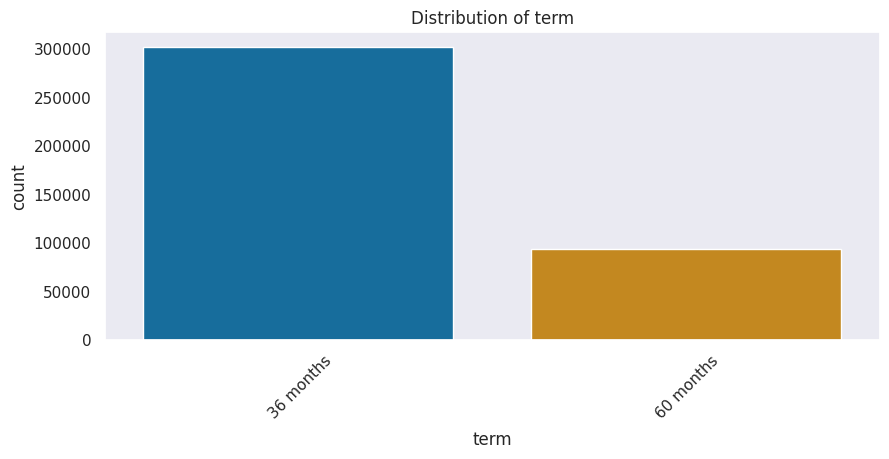

In [ ]:

for i in c_columns:
    plt.figure(figsize=(10, 4))
    sns.set(style="dark")
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i, palette='colorblind')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-14-0523d30258dc>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


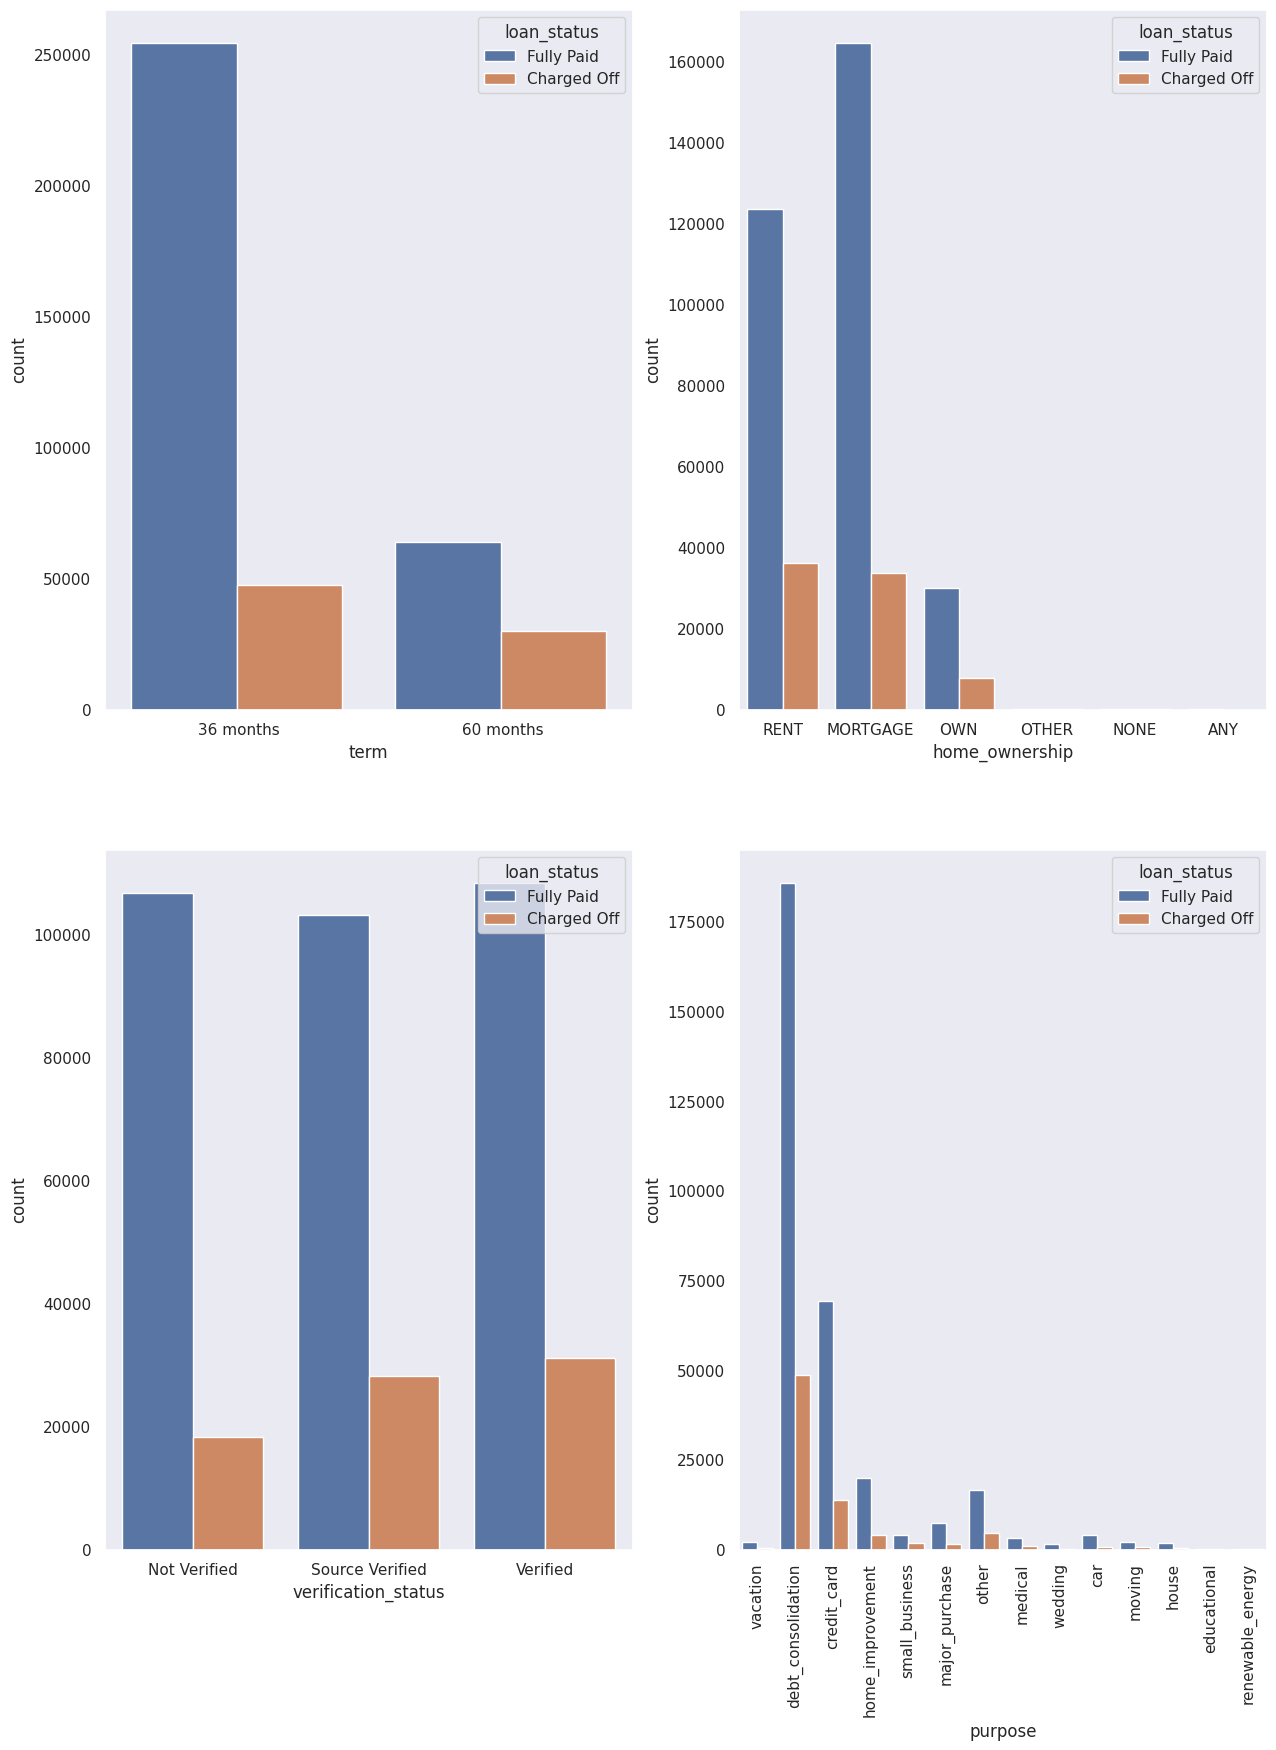

In [ ]:
# Bivariate analysis
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(2,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(2,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(2,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

<ipython-input-15-4fc383fe14dc>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


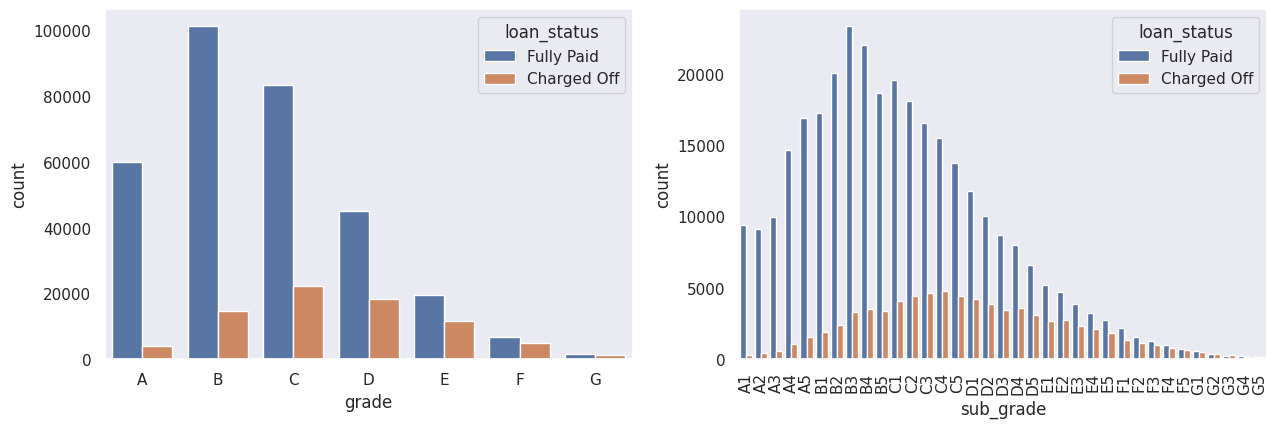

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

<ipython-input-16-955bc5b8fec7>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


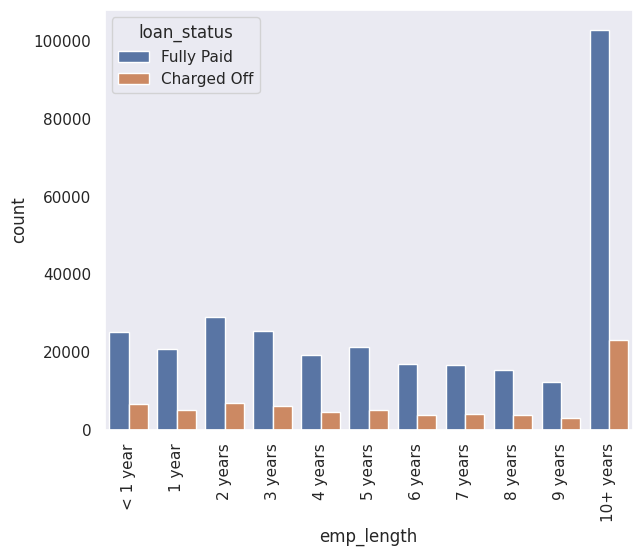

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

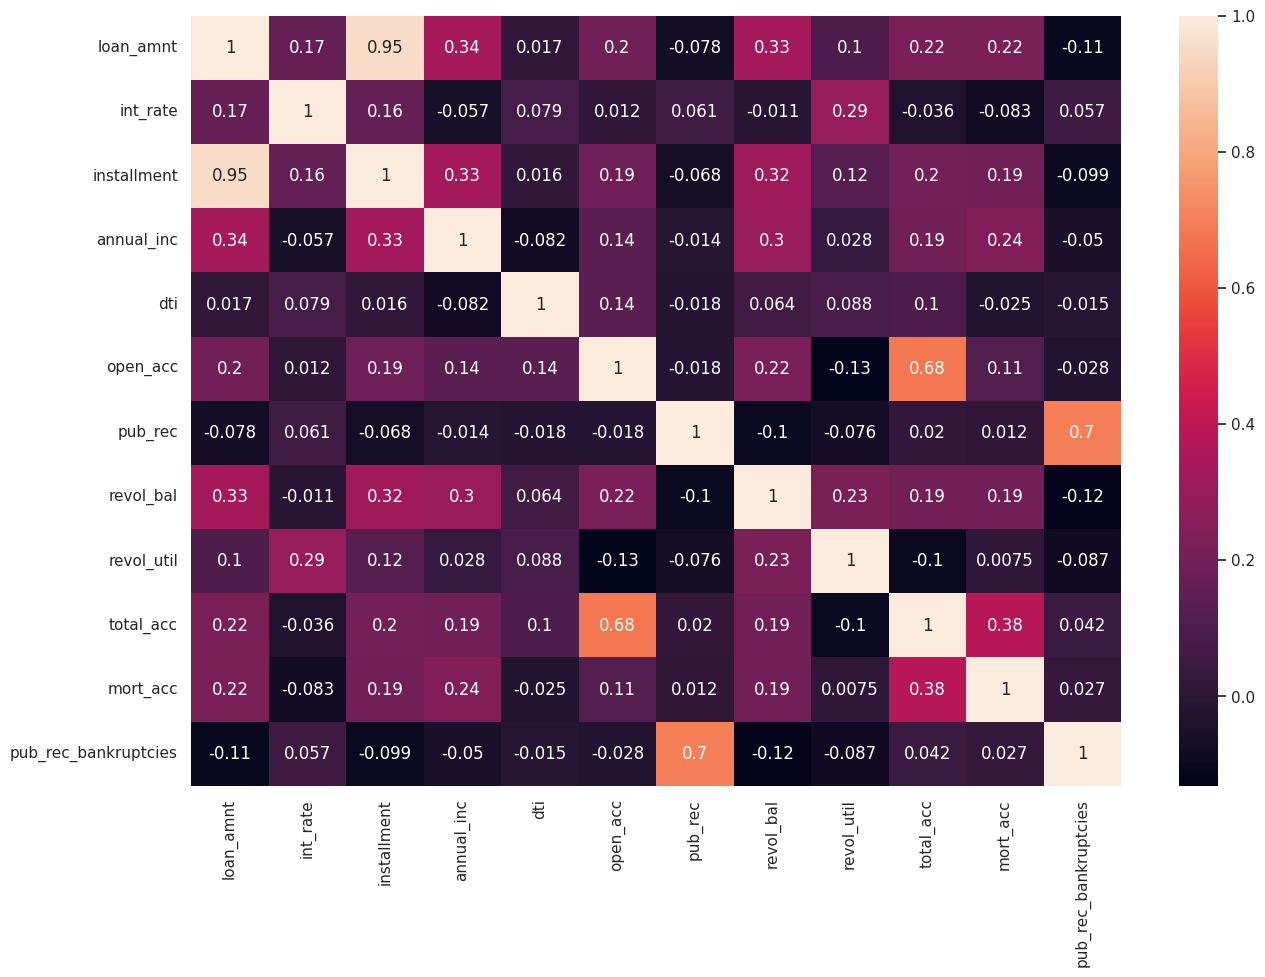

In [ ]:
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
df['pub_rec']=df.pub_rec.apply(pub_rec)

df['mort_acc']=df.mort_acc.apply(mort_acc)

df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

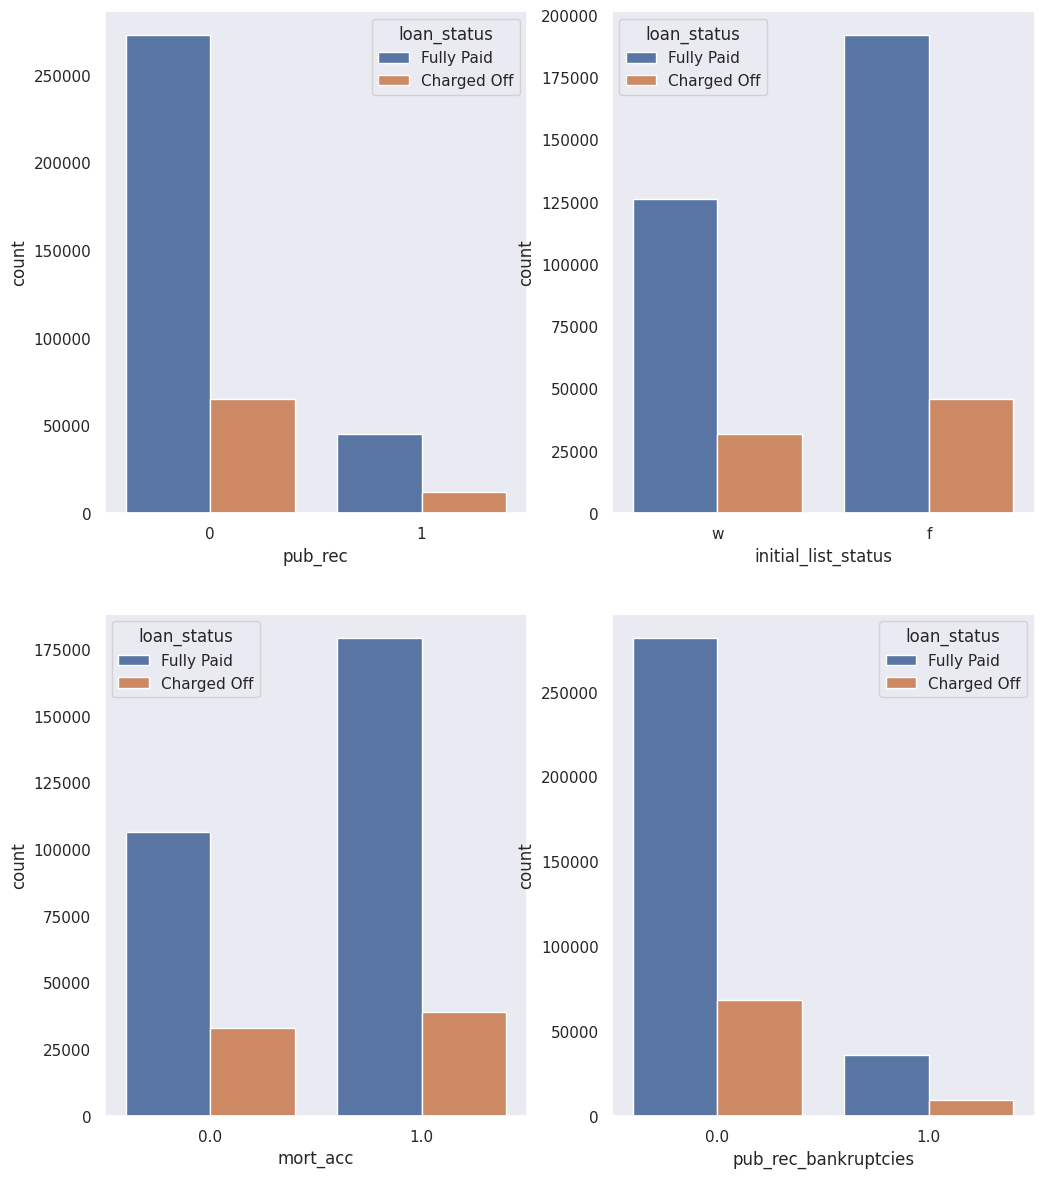

In [ ]:
plt.figure(figsize=(12,30))

plt.subplot(4,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(4,2,4)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

plt.show()

In [ ]:
def fillna_with_mode(df:pd.DataFrame,column:str) -> None:
  """
  df -> Dataframe
  column -> column name : string
  Inplace mode filling
  """
  mode_value = df[column].mode()[0]
  # print(df[column].mode()[0])
  df[column] = df[column].fillna(mode_value)


def fillna_with_median(df:pd.DataFrame, col:str) -> None:
  """
  df -> Dataframe
  column -> column name : string
  Inplace median filling
  """
  median_value = df[col].median()
  df[col] = df[col].fillna(median_value)

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object')

In [ ]:
for column in numeric_cols:
  fillna_with_median(df, column)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'], dtype='object')

In [ ]:
cat_cols = df.columns.difference(numeric_cols)
cat_cols

Index(['address', 'application_type', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'initial_list_status', 'issue_d', 'loan_status', 'purpose', 'sub_grade', 'term', 'title', 'verification_status'], dtype='object')

In [ ]:
for column in cat_cols:
  fillna_with_mode(df, column)

In [ ]:
df.isna().sum().reset_index()

,index,0
0,loan_amnt,0
1,term,0
2,int_rate,0
3,installment,0
4,grade,0
5,sub_grade,0
6,emp_title,0
7,emp_length,0
8,home_ownership,0
9,annual_inc,0


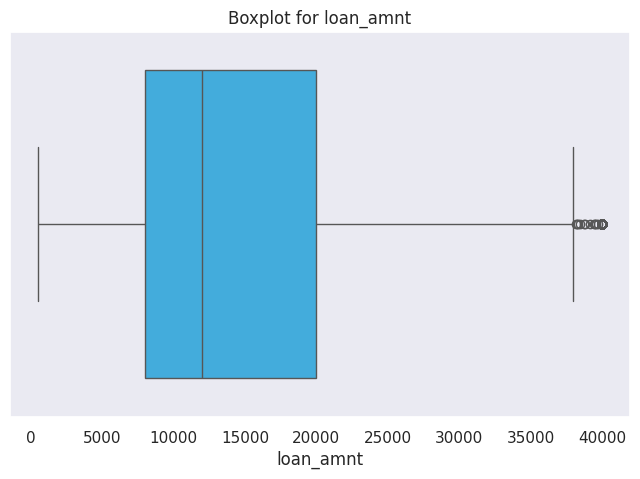

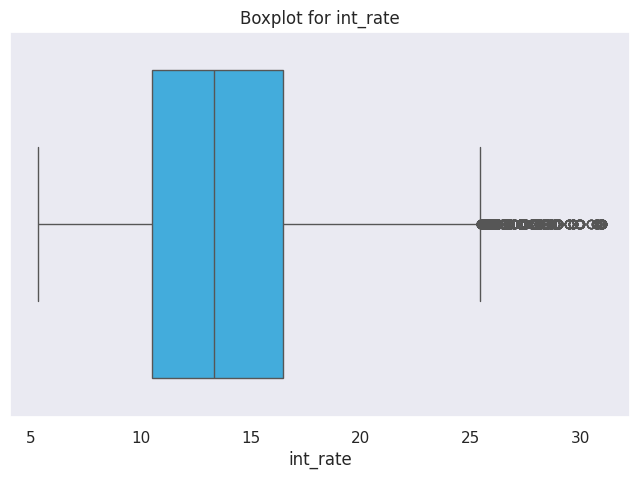

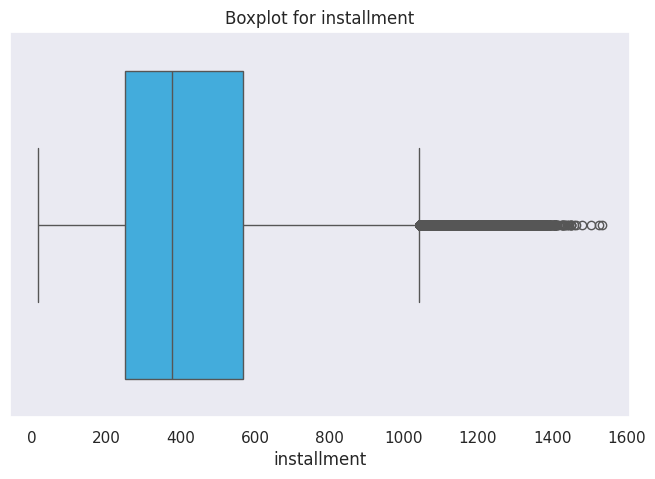

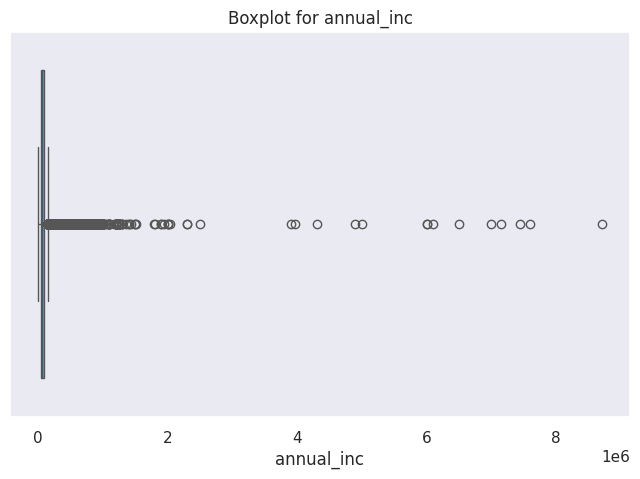

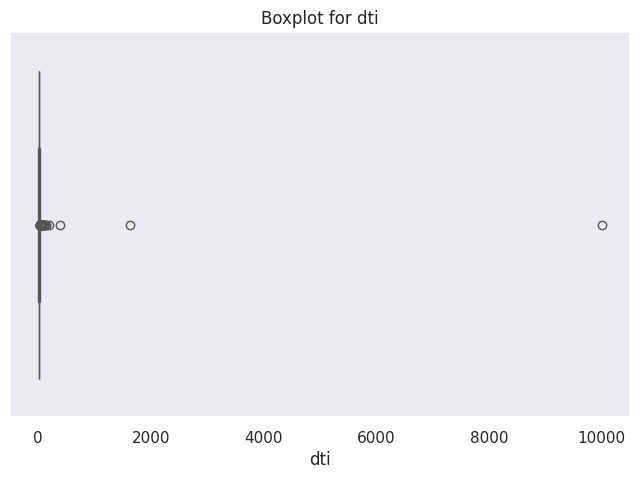

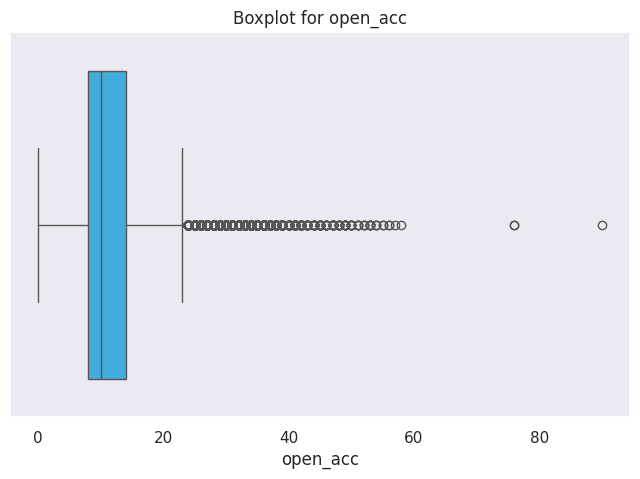

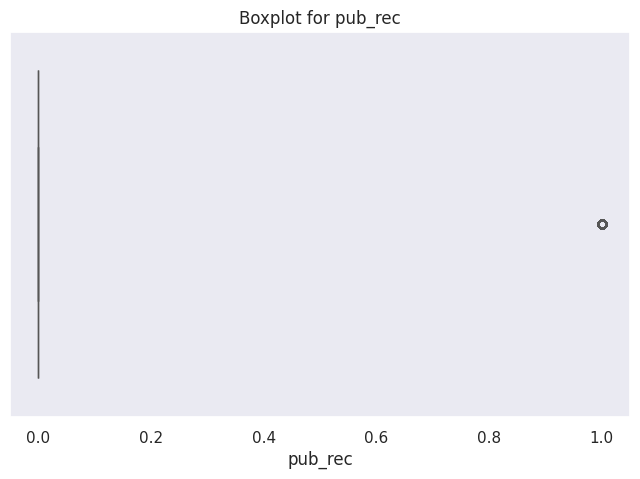

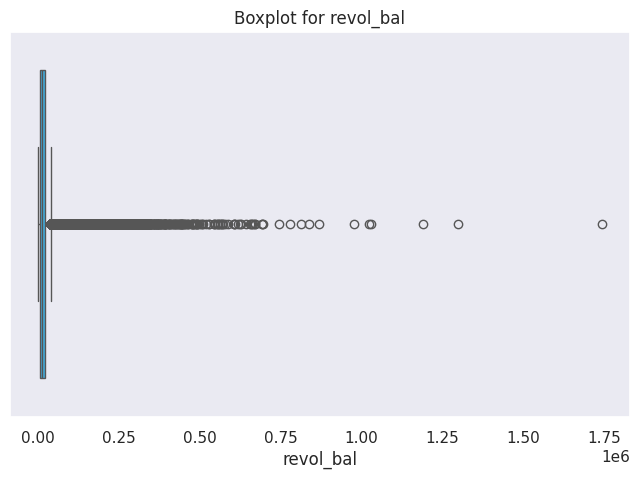

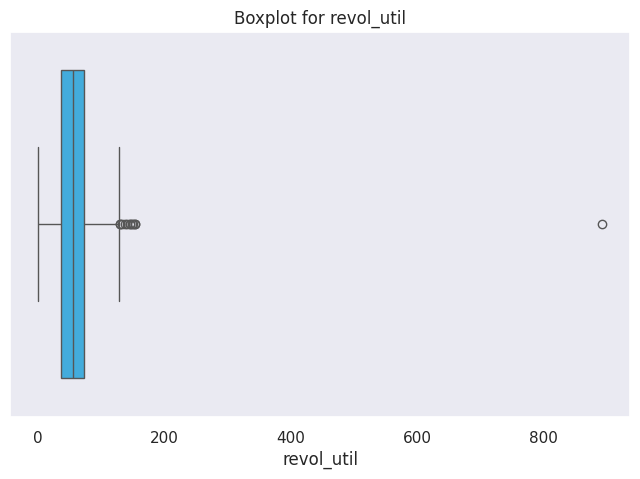

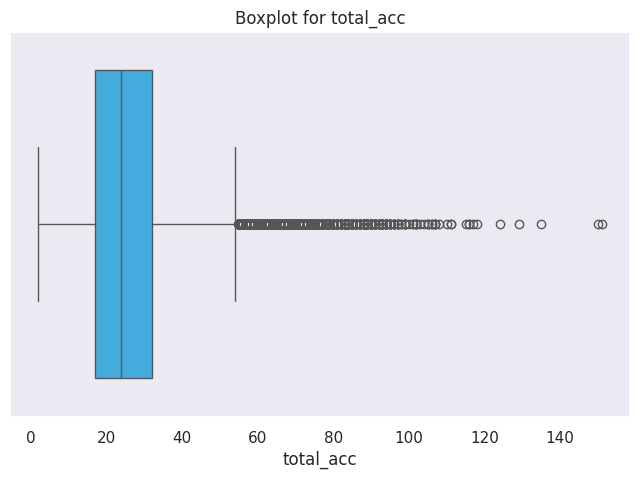

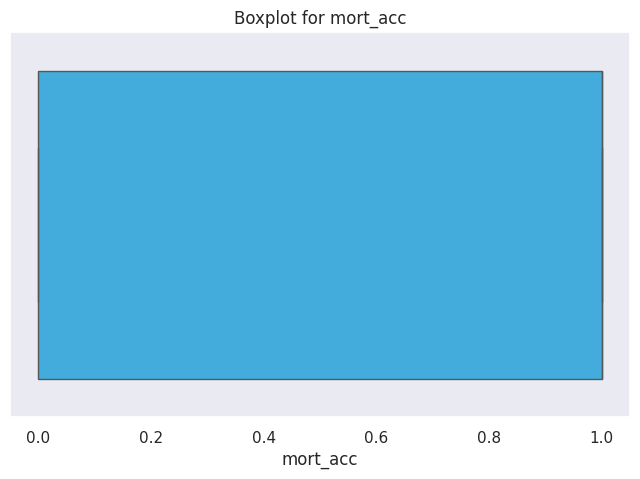

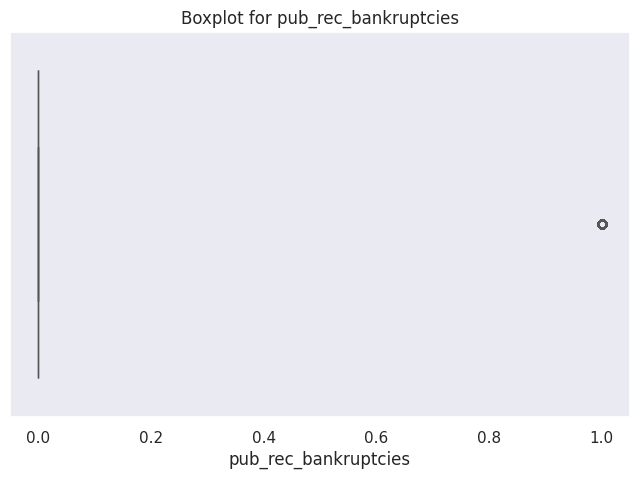

In [ ]:
def box_plot(col):
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col],color="#29B6F6")
        plt.title('Boxplot for {}'.format(col))
        plt.show()

for col in n_columns:
    box_plot(col)

In [ ]:
# Treating outliers
for col in n_columns:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        upper_limit = mean + 3 * std
        lower_limit = mean - 3 * std
        df = df[(df[col] < upper_limit) & (df[col] > lower_limit)]

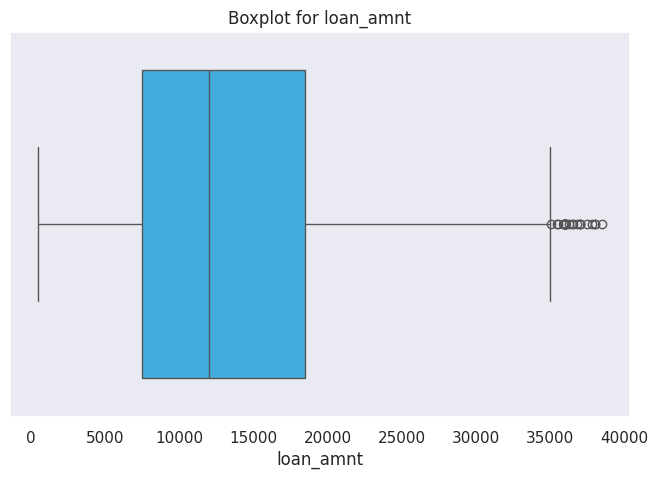

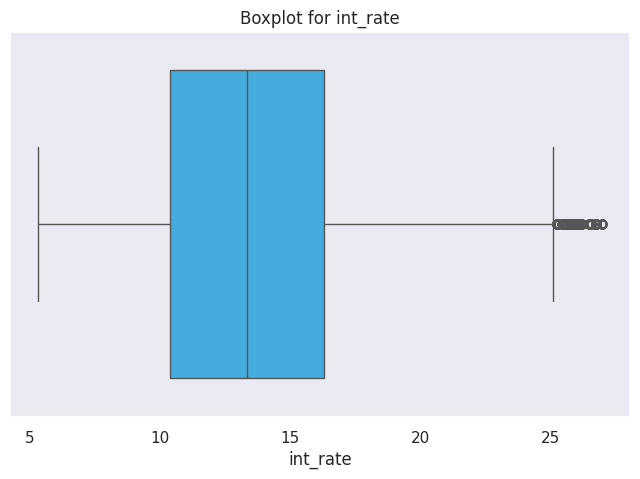

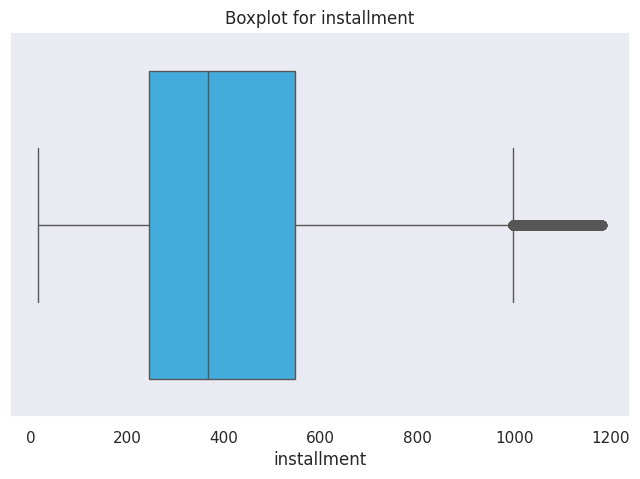

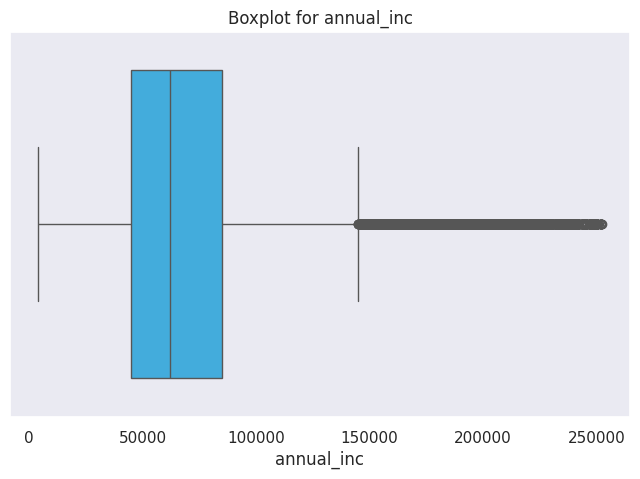

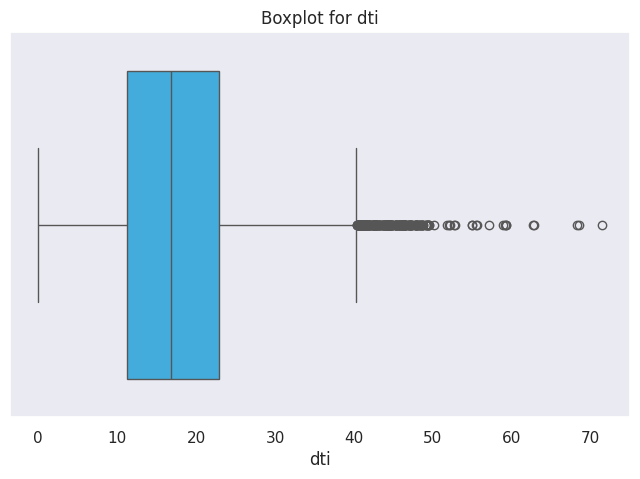

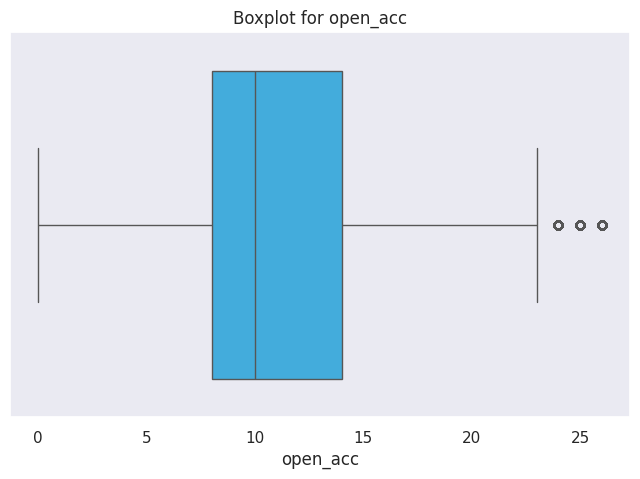

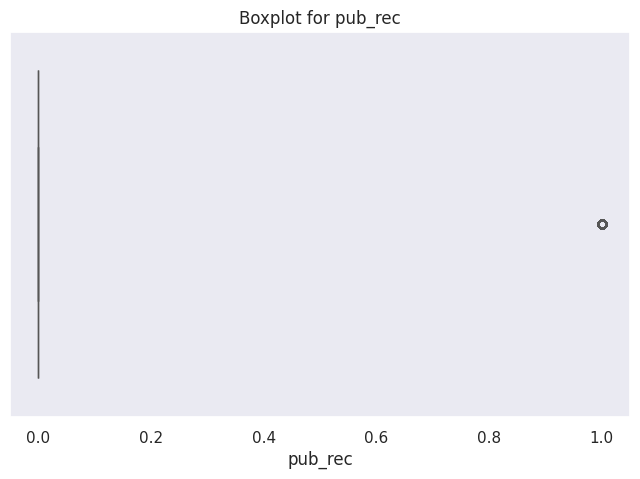

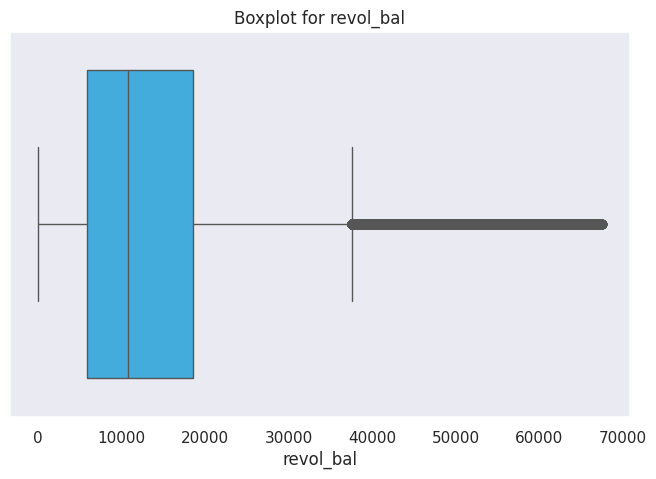

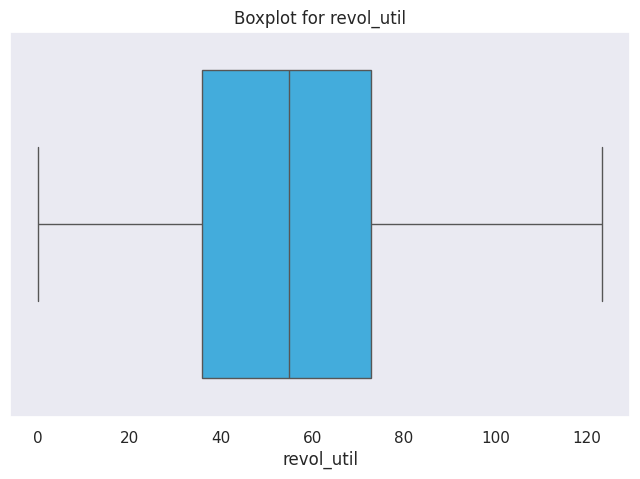

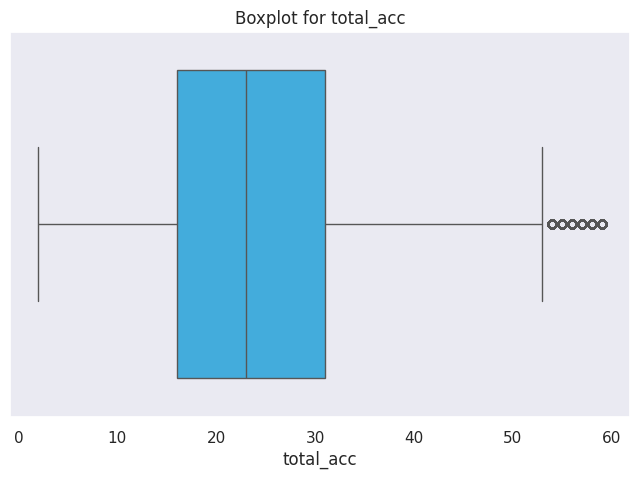

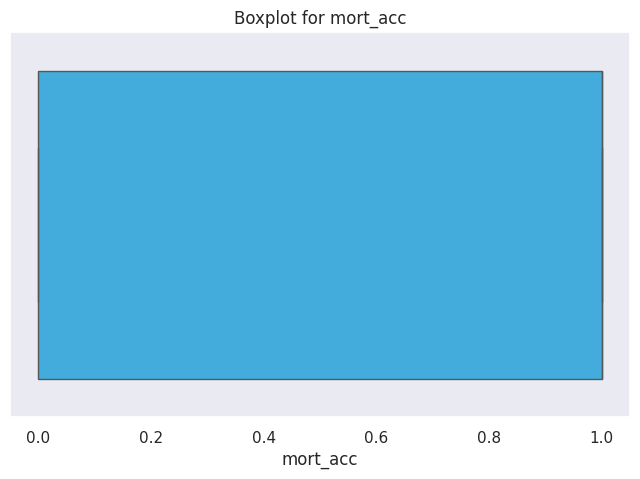

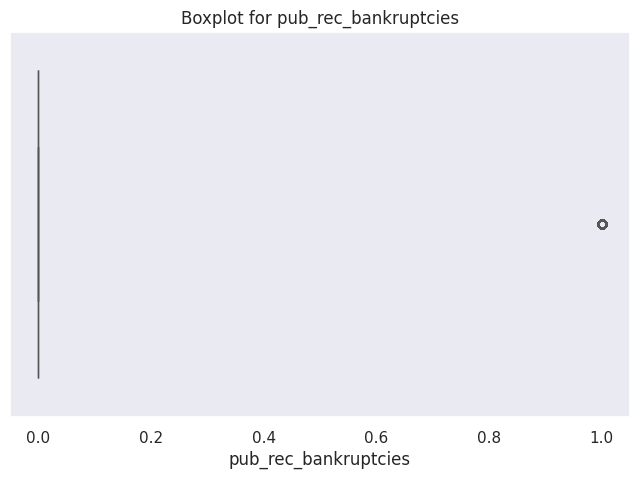

In [ ]:
def box_plot(col):
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col],color="#29B6F6")
        plt.title('Boxplot for {}'.format(col))
        plt.show()

for col in n_columns:
    box_plot(col)

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}

df['term'] = df['term'].map(term_values)

df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

list_status = {'w': 0, 'f': 1}

df['initial_list_status'] = df['initial_list_status'].map(list_status)

In [ ]:
zipcodes = df['address'].str.split().str[-1]

In [ ]:
df['regional_area'] = zipcodes.str[:3]
df['delivery_zone'] = zipcodes.str[-2:]

In [ ]:
columns=['issue_d', 'emp_title', 'title', 'sub_grade','address', 'earliest_cr_line', 'emp_length']

df.drop(columns,axis=1, inplace=True)

In [ ]:
dummies=['purpose', 'regional_area', 'delivery_zone','grade', 'verification_status', 'application_type', 'home_ownership']

data=pd.get_dummies(df,columns=dummies,drop_first=True)

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop('loan_status',axis=1)
y=data['loan_status']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(262193, 59)
(112369, 59)


In [ ]:
# Importing stats libraries

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model=LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(f'Accuracy of Logistic Regression Classifier on test set: {model_score * 100:.3f}%')

Accuracy of Logistic Regression Classifier on test set: 88.849%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     90327
           1       0.94      0.46      0.62     22042

    accuracy                           0.89    112369
   macro avg       0.91      0.73      0.78    112369
weighted avg       0.89      0.89      0.87    112369



[[89684   643]
 [11887 10155]]


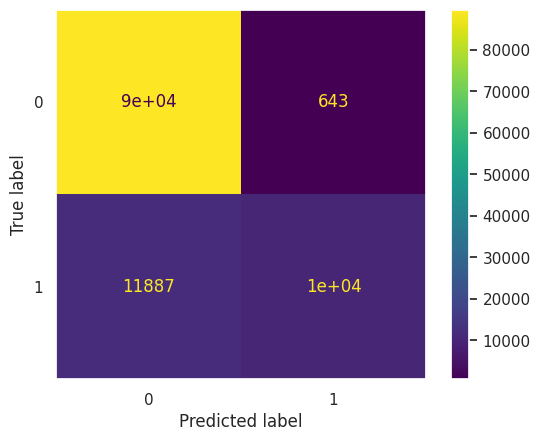

In [ ]:
#Plot confusion Matrix

cmatrix=confusion_matrix(y_test,y_pred)

print(cmatrix)

ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=model.classes_).plot()

In [ ]:
area_ruc = roc_auc_score(y_test, model.predict(X_test))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


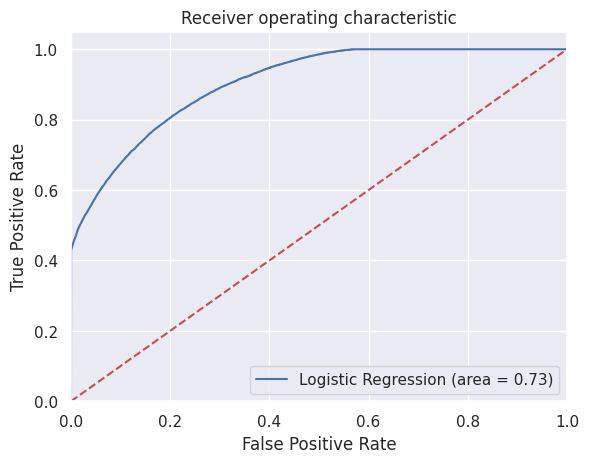

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_ruc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

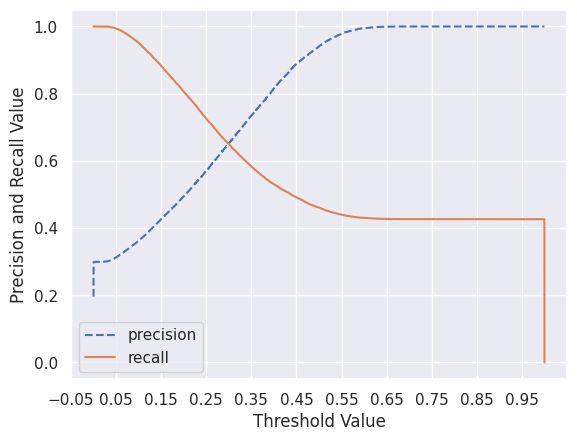

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

threshold_boundary = thresholds.shape[0]

plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')

plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.xlabel('Threshold Value')
plt.ylabel('Precision and Recall Value')
plt.legend()
plt.grid()
plt.show()